<b>Wenyang Fu (wf2796) and Rohan Nagar (ran679)</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

# Problem 1

Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

1. Taking the sum of 2 Gaussians and plotting the histogram.
2. Estimate the mean and the variance of the sum.

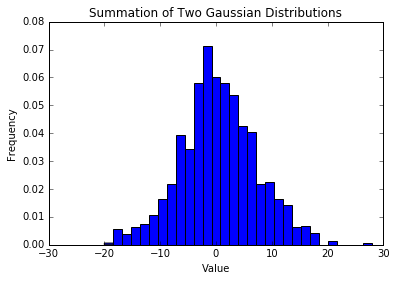

In [2]:
first_samples = np.random.normal(-10, 5, 1000)
second_samples = np.random.normal(10, 5, 1000)

samples = first_samples + second_samples

plt.hist(samples, 30, normed=True)
plt.title("Summation of Two Gaussian Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [3]:
# Estimate mean and variance
print('Mean: %s' % samples.mean())
print('Variance: %s' % samples.var())

Mean: 0.450841465357
Variance: 46.8246310768


# Problem 2 (Central Limit Theorem)

For $X_i$ to be iid Bernoulli random variable with value $\{-1,1\}$, look at the random variable $Z_n = \frac{1}{n} \sum{X_i}$. By taking many draws from $Z_n$, plot its histogram. Check that for small $n$ (say, 5-10) $Z_n$ does not look that much like a Gaussian, but when $n$ is bigger (already by the time $n$ = 30 or 50) it looks much more like a Gaussian.

In [4]:
def make_binom(n):
    Zn_dist = [(2 * np.random.binomial(n, 0.5) - n) / n for _ in range(1000)]

    plt.hist(Zn_dist)
    plt.title("Histogram - Summation of Gaussian Distributions")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

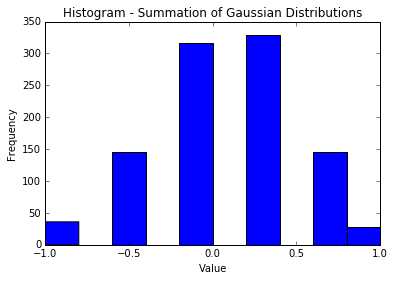

In [5]:
make_binom(5)

We can see that with the low value of n = 5, the distribution summation does not look much like a Gaussian.

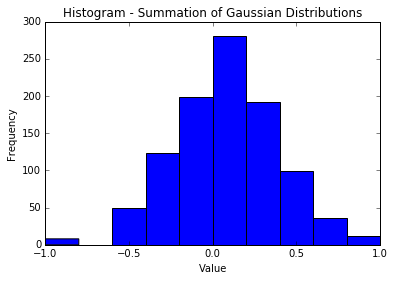

In [6]:
make_binom(10)

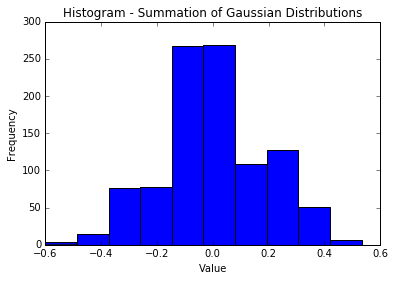

In [7]:
make_binom(30)

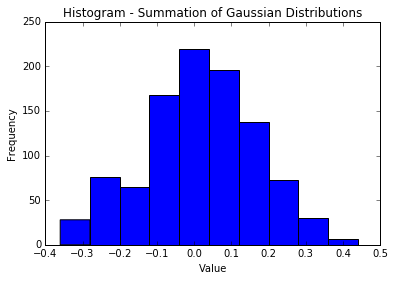

In [8]:
make_binom(50)

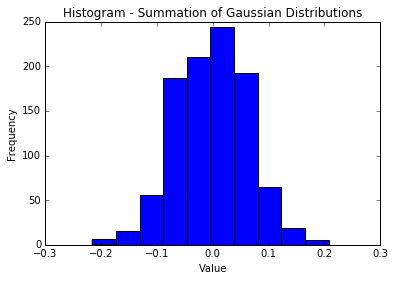

In [9]:
make_binom(250)

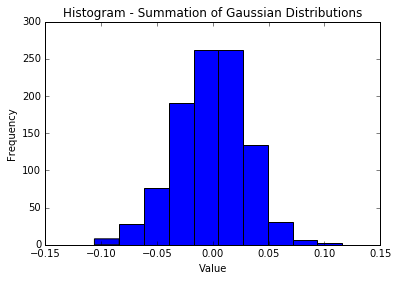

In [10]:
make_binom(1000)

Now that n is large (e.g. n=1000), the distribution is much more Gaussian-like.

# Problem 3

Estimating the mean and standard deviation from 1 dimensional data: generate 25000 samples from a Gaussian distribution with mean 0 and standard deviation 5. Then estimate the mean and standard deviation of this gaussian using numpy commands.

In [11]:
gaussian_dist = np.random.normal(0, 5, 25000)
print("Mean: {}".format(gaussian_dist.mean()))
print("Variance: {}".format(gaussian_dist.var()))

Mean: 0.0005173345456282055
Variance: 24.980614569322494


# Problem 4

Estimating the mean and covariance matrix for multi-dimensional data: generate 10000 samples of 2 dimensional data from the Gaussian distribution

$$
(X_i\; Y_i): \mathcal{N} ([-5\; 5], [20\; .8\; .8\; 30])
$$

Then, estimate the mean and covariance matrix for this multi-dimensional data using numpy commands.

In [12]:
mean = [-5, 5]
cov = [[20, .8], [.8, 30]]

dist = np.random.multivariate_normal(mean, cov, 10000)
print("Mean: {}".format(dist.mean()))
print("Variance:\n{}".format(np.cov(dist, rowvar=False)))

Mean: 0.0024762727594020706
Variance:
[[ 20.14703743   0.43410559]
 [  0.43410559  29.47431676]]


# Problem 5

Consider a coin such that probability of heads is 2/3. Throw the coin 100 times and estimate the probability of getting 50 or fewer heads.

In [13]:
num_experiments = 100000
experiments = np.array([np.random.binomial(n=100, p=2/3) for _ in range(num_experiments)])
num_success = len(experiments[experiments <= 50])
estimate = num_success / num_experiments
estimate

0.0004

In [14]:
from scipy.misc import comb

p = 2/3
p_at_most_50 = sum([comb(100, n) * np.power(p, n) * np.power(1 - p, 100 - n) for n in range(50)])
p_at_most_50

0.0001989326425396602

# Problem 6

Download from Canvas/Files the dataset PatientData.csv

Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:

1. How many patients and how many features are there?
2. What is the meaning of the first 4 features? See if you can understand what they mean.
3. Are there missing values? Replace them with the average of the corresponding feature column
4. How could you test which features strongly influence the patient condition and which do not?

List what you think are the three most important features.

For help: read this introduction to Pandas http://pandas.pydata.org/pandas-docs/stable/10min.html and this workflow of exploring features (for a different dataset) https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/discussion.

In [15]:
data = pd.read_csv('PatientData.csv', header=None, na_values='?')

X_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1]

In [16]:
X_data.shape

(452, 279)

1. There are 451 patients (rows) and 279 features (columns).

In [17]:
# Let's look at the first four columns.
X_data.ix[:,:3].head(10)

,0,1,2,3
0,75,0,190,80
1,56,1,165,64
2,54,0,172,95
3,55,0,175,94
4,75,0,190,80
5,13,0,169,51
6,40,1,160,52
7,49,1,162,54
8,44,0,168,56
9,50,1,167,67


In [18]:
X_data[0].value_counts().head(10)

46    15
36    14
37    14
47    14
44    13
35    13
45    13
40    12
50    12
57    12
Name: 0, dtype: int64

It looks like the first column is <b>age</b>. The most common numbers are in the 30-50 range, which is typically what you would expect from an age variable.

In [19]:
X_data[1].value_counts()

1    249
0    203
Name: 1, dtype: int64

The second column looks to be a <b>binary variable</b>. It's hard to determine the meaning of this column without more context.

In [20]:
X_data[2].value_counts().head(10)

160    81
165    46
170    40
155    23
175    21
156    19
163    16
162    15
168    15
172    14
Name: 2, dtype: int64

Looking at the third column, it appears that this represents <b>height</b>. These values look like the height of a patient in centimeters, since 160 cm = 5' 3". That appears to be of an average height.

In [21]:
X_data[3].value_counts().head(10)

80    29
70    29
65    26
60    21
75    15
55    15
74    14
68    13
72    12
85    12
Name: 3, dtype: int64

The fourth column we can guess to be <b>weight</b>. These values look like weight in kilograms, and it makes sense because the average human weight is 80.7 kg [http://www.biomedcentral.com/content/pdf/1471-2458-12-439.pd].

Now, let's determine if there are any missing values in the data.

In [22]:
X_data.isnull().any(axis=0)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11      True
12      True
13      True
14      True
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
dtype: bool

3: There are missing values, as we can see with the 'True' outputs above. We will replace them with the average of each column.

In [23]:
X_data = X_data.fillna(X_data.mean())

4: We could test feature importance by fitting a random forest the data, and then look at the feature importance.

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_data, y_data)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking (top 10)
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 196 (0.032086)
2. feature 227 (0.029950)
3. feature 276 (0.026609)
4. feature 14 (0.026143)
5. feature 223 (0.023115)
6. feature 176 (0.020907)
7. feature 241 (0.018452)
8. feature 259 (0.017813)
9. feature 239 (0.016889)
10. feature 248 (0.016487)


From our implementation, it looks like the three most important features that influence the patient condtion are:

1. feature 14
2. feature 226
3. feature 223

These had the most influence on the random forest that we fit.